In [ ]:
%matplotlib inline


PREM: Preliminary Reference Earth Model
=======================================

The Preliminary reference Earth model (PREM) [Dziewonsky1981]_ is a one-dimensional
model representing the average Earth properties as a function of planetary radius.  The
model includes the depth, density, seismic velocities, attenuation (Q) and anisotropic
parameter ($\eta$) on the boundaries of several Earth layers.  The data is loaded
into :class:`pandas.DataFrame` objects, which can be used to plot and make computations.



     radius   depth   density       Vpv       Vph      Vsv      Vsh  eta  \
0    6371.0     0.0   1.02000   1.45000   1.45000  0.00000  0.00000  1.0   
1    6370.0     1.0   1.02000   1.45000   1.45000  0.00000  0.00000  1.0   
2    6369.0     2.0   1.02000   1.45000   1.45000  0.00000  0.00000  1.0   
3    6368.0     3.0   1.02000   1.45000   1.45000  0.00000  0.00000  1.0   
4    6368.0     3.0   2.60000   5.80000   5.80000  3.20000  3.20000  1.0   
..      ...     ...       ...       ...       ...      ...      ...  ...   
194   400.0  5971.0  13.05366  11.23711  11.23711  3.65027  3.65027  1.0   
195   300.0  6071.0  13.06890  11.24809  11.24809  3.65794  3.65794  1.0   
196   200.0  6171.0  13.07979  11.25593  11.25593  3.66342  3.66342  1.0   
197   100.0  6271.0  13.08632  11.26063  11.26063  3.66670  3.66670  1.0   
198     0.0  6371.0  13.08850  11.26220  11.26220  3.66780  3.66780  1.0   

      Q_mu  Q_kappa  
0      0.0  57823.0  
1      0.0  57823.0  
2      0.0  57823.0  

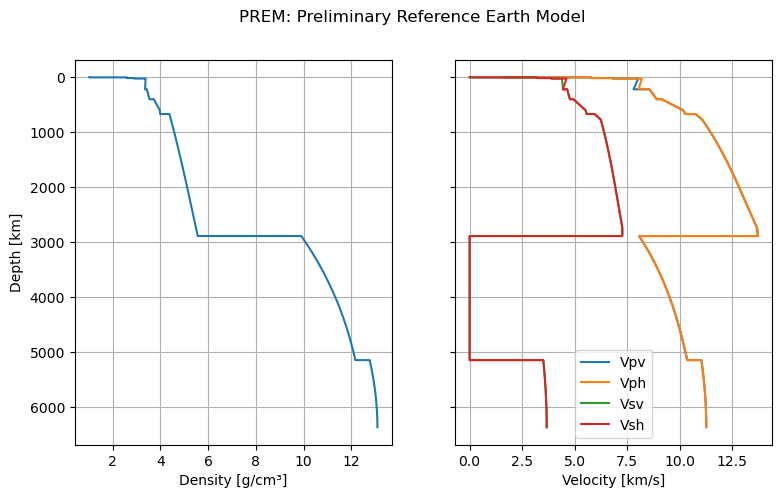

In [88]:
import rockhound as rh
import matplotlib.pyplot as plt

# Load PREM into a DataFrame
prem = rh.fetch_prem()
print(prem)


# Plot density and velocities
fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
fig.suptitle("PREM: Preliminary Reference Earth Model")
ax = axes[0]
prem.plot("density", "depth", legend=False, ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Density [g/cm³]")
ax.set_ylabel("Depth [km]")
ax.grid()
ax = axes[1]
for velocity in ["Vpv", "Vph", "Vsv", "Vsh"]:
    prem.plot(velocity, "depth", legend=False, ax=ax, label=velocity)
ax.grid()
ax.legend()
ax.set_xlabel("Velocity [km/s]")
plt.show()

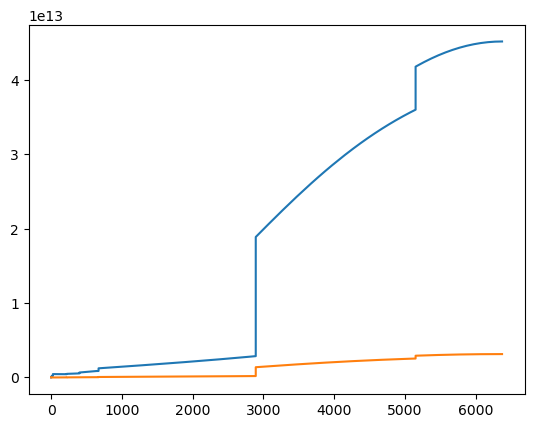

In [96]:
%run solve_bm3.ipynb

import rockhound as rh
import matplotlib.pyplot as plt

# Load PREM into a DataFrame
prem = rh.fetch_prem()



xval_list = prem.loc[:,'depth']
sio2_yval_list = []
mgsio3_yval_list = []
for n in range(len(xval_list)):
    #print(n, prem.loc[:,'density'][n] * 1000)
    add_sio2 = bm3(prem.loc[:,'density'][n] * 1000, 2143.5, 309900000000, 4.59)
    sio2_yval_list.append(add_sio2)

    add_mgsio3 = bm3(prem.loc[:,'density'][n] * 1000, 4101, 256000000000, 4)
    mgsio3_yval_list.append(add_mgsio3)
    
    #add_mg2sio3 = bm3(prem.loc[:,'density'][n] * 1000, 2143.5, 309900000000, 4.59)
    #mg2sio3_yval_list.append(add_mg2sio3)

ax.set_xlabel("Depth [km] (not radius)")
plt.plot(xval_list, sio2_yval_list)
plt.plot(xval_list, mgsio3_yval_list)
plt.show()